# Kruskal’s Minimum Spanning Tree Algorithm 

## 1. Creating the class

In [2]:
class DisjointSet:
    parent = {}
    def __init__(self, N):
        # create N disjoint sets (one for each vertex)
        for i in range(N):
            self.parent[i] = i #|1|2|2|2|
 
    # Find the root of the set in which element k belongs
    def Find(self, k):
 
        # if k is root
        if self.parent[k] == k:
            return k
 
        # recur for parent until we find root
        return self.Find(self.parent[k])
 
    # Perform Union of two subsets
    def Union(self, a, b):
 
        # find root of the sets in which elements
        # x and y belongs
        x = self.Find(a)
        y = self.Find(b)
 
        self.parent[x] = y
 
 
# construct MST using Kruskal's algorithm
def KruskalAlgo(edges, N):
    # stores edges present in MST
    MST = []
    ds = DisjointSet(N)

 
    index = 0
 
    # MST contains exactly V-1 edges
    while len(MST) != N - 1:
 
        # consider next edge with minimum weight from the graph
        (src, dest, weight) = edges[index]
        index = index + 1
 
        # find root of the sets to which two endpoint
        # vertices of next_edge belongs
        x = ds.Find(src)
        y = ds.Find(dest)
# [(0 1 1),(3 2 1)(1 3 2)(2 0 2)]   x,y = [(0,1)(3,2)(1,2)(2,2)]
        # different connected components and can be included in MST
        if x != y:
            MST.append((src, dest, weight))
            ds.Union(x, y)
            #print(ds)
 
    return MST
 
 


## 2. Calling the Function

Press 1 to use default graph
Press 2 to use custom graph
2
Enter the number of vertices = 9
Enter the number of edges = 12
Enter the tuple (E.g u,v,w)0 1 4
Enter the tuple (E.g u,v,w)0 7 8
Enter the tuple (E.g u,v,w)1 7 11
Enter the tuple (E.g u,v,w)7 8 7
Enter the tuple (E.g u,v,w)8 6 6
Enter the tuple (E.g u,v,w)6 7 1
Enter the tuple (E.g u,v,w)1 2 8
Enter the tuple (E.g u,v,w)2 3 7
Enter the tuple (E.g u,v,w)5 6 2
Enter the tuple (E.g u,v,w)3 5 14
Enter the tuple (E.g u,v,w)3 4 9
Enter the tuple (E.g u,v,w)5 4 10

Printing the Graph: 


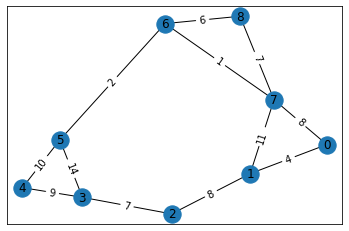

In [3]:
import networkx as nx 
G = nx.Graph() 
if __name__ == '__main__':
    edges = []
    N = 0 
    choice = int(input("Press 1 to use default graph\nPress 2 to use custom graph\n"))
    if choice == 1:
        
        N = 4
        edges = [
#             (1, 2, 7), (1, 4, 6), (4, 2, 9), (4, 3, 8), (2, 3, 6)
            (0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)
        ]
        
    elif choice == 2:
        N = int(input("Enter the number of vertices = "))
        E = int(input("Enter the number of edges = "))

        for i in range(E):
            inValue = input("Enter the tuple (E.g u,v,w)")
            edges.append(tuple(list(map(int, inValue.strip().split()))))
            #print(edges)
        
    G.add_weighted_edges_from(edges,weight="weight") 
    #nx.draw_networkx(G, with_labels = True) 
    pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    # sort edges by increasing weight
    edges.sort(key=lambda x: x[2])
 
    # Number of vertices in the graph
    mcst = 0
 
    # construct graph
    #print(N)
    #print(edges)

    mst = KruskalAlgo(edges, N)
    #print(mst)
    for u,v,w in mst:
        mcst+=w
        
 
    print("\nPrinting the Graph: ")
    
#     [(0, 1, 1), (1, 3, 2), (3, 2, 1), (2, 0, 2)]


# 0 1 6
# 0 2 4
# 2 3 9
# 2 5 2
# 5 6 15
# 5 7 8
# 4 7 3
# 1 7 10
# 1 4 14
# 1 2 5

# 10 edges


#### 3.Printing the Minimum Spanning Tree and MCST

In [4]:
print("Minimum Cost Spanning Tree  = ",mcst)


Minimum Cost Spanning Tree  =  45


In [5]:
print("\nEdges in Minimum Spanning Tree  = ",mst)


Edges in Minimum Spanning Tree  =  [(6, 7, 1), (5, 6, 2), (0, 1, 4), (8, 6, 6), (2, 3, 7), (0, 7, 8), (1, 2, 8), (3, 4, 9)]



Printing the Minimum Spanning Tree



{(6, 7): Text(0.03043662896226515, 0.04319790850899971, '1'),
 (6, 5): Text(0.7243236867689564, 0.4798704294194641, '2'),
 (6, 8): Text(0.48609593781152205, 0.5746354560765625, '6'),
 (7, 0): Text(-0.44644915909618976, -0.4745637163927352, '8'),
 (0, 1): Text(-0.3398789010444172, -0.6494725068280692, '4'),
 (1, 2): Text(-0.15054300660839354, -0.5087553075087474, '8'),
 (2, 3): Text(-0.21178676551211684, -0.16487029537683323, '7'),
 (3, 4): Text(-0.3891037721069387, 0.1339330989310776, '9')}

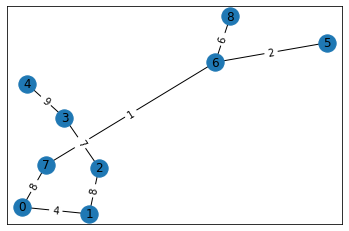

In [6]:
mstg = nx.Graph() 
print("\nPrinting the Minimum Spanning Tree\n")
# print(mst)
mstg.add_weighted_edges_from(mst,weight="weight") 
#nx.draw_networkx(G, with_labels = True) 
pos=nx.spring_layout(mstg) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(mstg,pos)
labels = nx.get_edge_attributes(mstg,'weight')
nx.draw_networkx_edge_labels(mstg,pos,edge_labels=labels)